<a href="https://colab.research.google.com/github/divx1979/IMB_CLASSIFICATION/blob/main/Mammography_IMB_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract
Among many cancers, breast cancer is the second most common cause of death in women. Early detection and early treatment reduce breast cancer mortality. Mammography plays an important role in breast cancer screening because it can detect early breast masses or calcification region. One of the drawbacks in breast mammography is breast cancer masses are more difficult to be found in extremely dense breast tissue. We select 106 breast mammography images with masses from INbreast database. Through data augmentation, the number of breast mammography images was increased to 7632.

# Approach
Step-by-Step Approach for Handling Imbalanced Mammography Dataset
Data Exploration and Preprocessing:

Load the Data: Start by loading your dataset to understand its structure, features, and labels.
Initial Exploration: Use descriptive statistics and visualizations to understand the distribution of classes, check for missing values, and identify any apparent anomalies or outliers.
Preprocess the Data: Handle missing values either by imputation or by removing records with missing entries. Normalize or standardize the data if necessary, especially if using algorithms sensitive to the scale of input data (like SVM or k-nearest neighbors).
Balancing the Dataset:

Oversampling Minority Class: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.
Undersampling Majority Class: Reduce the number of samples from the majority class to balance the dataset. However, be cautious as this may lead to loss of valuable data.
Combination of Over and Undersampling: Sometimes a combination of both techniques can yield better results.
Feature Selection:

Reduce Dimensionality: Use methods like PCA (Principal Component Analysis) to reduce the number of features, which can help in mitigating the curse of dimensionality and improving model performance.
Feature Importance: Employ algorithms that provide feature importance (like Random Forests) to select the most relevant features.
Model Selection and Training:

Choose Models: Select a variety of models to test. Given the imbalanced nature, consider models known for handling imbalances better, like Random Forest or Gradient Boosting Machines.
Cross-Validation: Use stratified k-fold cross-validation to ensure your training and validation data represent all classes proportionally.
Hyperparameter Tuning: Utilize grid search or random search across hyperparameters to find the optimal configuration for each model.
Evaluation Metrics:

Choose Right Metrics: Accuracy is not a good measure for imbalanced datasets. Instead, use F1-score, Precision, Recall, ROC-AUC for a more accurate assessment.
Confusion Matrix: Analyze the confusion matrix to understand the types of errors your model is making (e.g., false positives vs. false negatives).
Post-Processing:

Threshold Moving: Adjust the decision threshold of your classifier to increase recall or precision, depending on the requirement (e.g., preferring to catch more positives at the expense of false positives).
Ensemble Methods: Consider using ensemble techniques like stacking or blending to improve model robustness and performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from pandas.plotting import scatter_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier

In [2]:
da1 = pd.read_csv('/content/mammography.csv', header = None)

In [3]:
print(da1.head())

          0         1         2         3         4         5     6
0  0.230020  5.072578 -0.276061  0.832444 -0.377866  0.480322  '-1'
1  0.155491 -0.169390  0.670652 -0.859553 -0.377866 -0.945723  '-1'
2 -0.784415 -0.443654  5.674705 -0.859553 -0.377866 -0.945723  '-1'
3  0.546088  0.131415 -0.456387 -0.859553 -0.377866 -0.945723  '-1'
4 -0.102987 -0.394994 -0.140816  0.979703 -0.377866  1.013566  '-1'


In [4]:
print(da1.shape)

(11183, 7)


In [5]:
tar = da1.values[:, -1]

count = Counter(tar)

for k, v in count.items():
  perc = v/len(tar) * 100
  print(k, v, perc)

'-1' 10923 97.67504247518555
'1' 260 2.3249575248144505


In [6]:
##hist

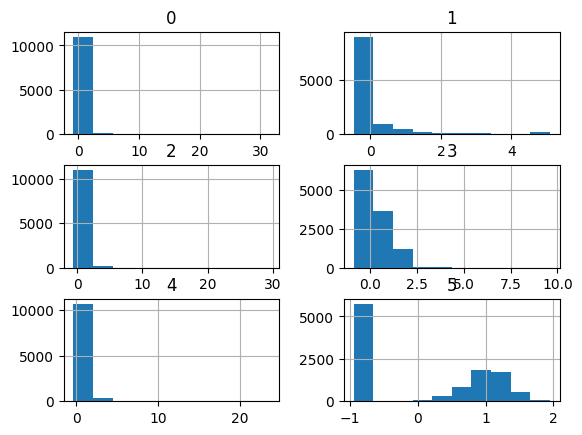

In [7]:
da1.hist()

plt.show()

In [8]:
print([str(x) for x in da1.values[:, -1]])  # This will show you what the actual values look like.

["'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'", "'-1'",

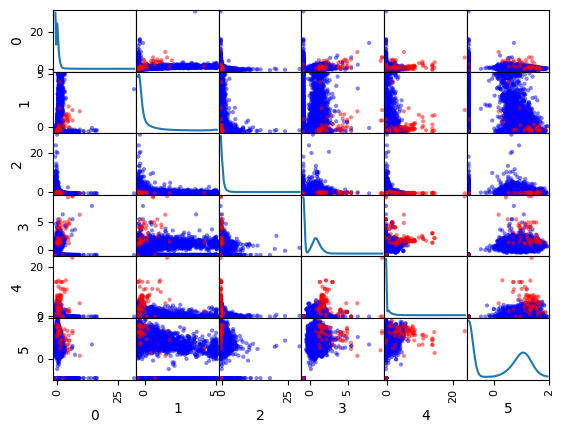

In [9]:
col_dict = {"-1":'blue', "1":'red'}

color = [col_dict[str(x).strip("'")] for x in da1.values[:, -1]]

scatter_matrix(da1, diagonal = 'kde', color = color)

plt.show()

In [10]:
##def mod1, eval mod1 and baseline

In [11]:
def load_data(path):
  da1 = pd.read_csv(path, header = None)
  da1 = da1.values

  X, y = da1[:, :-1], da1[:, -1]

  y = LabelEncoder().fit_transform(y)

  return X, y

def eval_mod1(X, y, mod1):

  cv1 = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)

  sc1 = cross_val_score(mod1, X, y, scoring = 'roc_auc', cv = cv1, n_jobs = -1)

  return sc1

path = '/content/mammography.csv'

X, y = load_data(path)

print(X.shape, y.shape, Counter(y))

mod1 = DummyClassifier(strategy = 'stratified')

sc = eval_mod1(X, y, mod1)

print(np.mean(sc), np.std(sc))

(11183, 6) (11183,) Counter({0: 10923, 1: 260})
0.498812498114877 0.013165357058602865


**That's The Base Model Above**

# Eval ML Models
## Let's start eval diff ML mods on this dataset and assess
1. Log Reg
2. SVM
3. BAG
4. RF
5. GBM

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

LR 0.9188621030618181 0.04152764628555857
SVM 0.8834842844321872 0.037974458464854956
RF 0.9486764722499996 0.027442725779880675
BAG 0.9397913682156944 0.027347942734807534
GBM 0.9183156799878596 0.03386264503488307


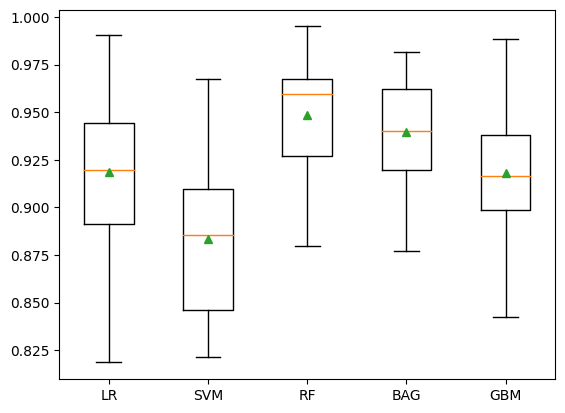

In [13]:
##data
def load_data(path):
  da1 = pd.read_csv(path, header = None)
  da1 = da1.values

  X, y = da1[:, :-1], da1[:, -1]

  y = LabelEncoder().fit_transform(y)

  return X, y

##eval
def eval_mod(X, y, mod1):

  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

  sc1 = cross_val_score(mod1, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1)

  return sc1

##mods
def get_mods():
  mod1, names = list(), list()

  mod1.append(LogisticRegression(solver = 'lbfgs'))
  names.append('LR')

  mod1.append(SVC(gamma = 'scale'))
  names.append('SVM')

  mod1.append(RandomForestClassifier(n_estimators = 1000))
  names.append('RF')

  mod1.append(BaggingClassifier(n_estimators = 1000))
  names.append('BAG')

  mod1.append(GradientBoostingClassifier(n_estimators = 1000))
  names.append('GBM')

  return mod1, names

##locate
path = '/content/mammography.csv'

X, y = load_data(path)

mod1, names = get_mods()

res = list()

for i in range(len(mod1)):

  sc = eval_mod(X, y, mod1[i])

  res.append(sc)

  print(names[i], np.mean(sc), np.std(sc))

##viz
plt.boxplot(res, labels = names, showmeans = True)
plt.show()

**Now, Let's tune the LR And SVM And RF using Power Transform In A New Pipe**

LR 0.9215467890563781 0.037529950455339404
SVM 0.9585788187910961 0.018392519987523726
RF 0.947492958662376 0.029260487594077803


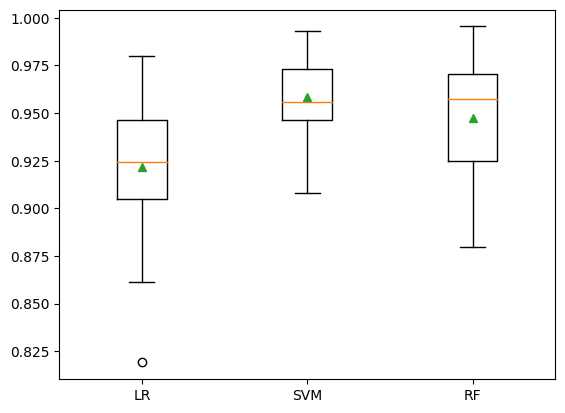

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

##data
def load_data(path):
  da1 = pd.read_csv(path, header = None)
  da1 = da1.values

  X, y = da1[:, :-1], da1[:, -1]

  y = LabelEncoder().fit_transform(y)

  return X, y

##eval
def eval_mod(X, y, mod1):

  cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

  sc1 = cross_val_score(mod1, X, y, scoring = 'roc_auc', cv = cv, n_jobs = -1)

  return sc1

##mods
def get_mods():
  mod1, names = list(), list()

  mod1.append(LogisticRegression(solver = 'lbfgs', class_weight = 'balanced'))
  names.append('LR')

  mod1.append(SVC(gamma = 'scale', class_weight = 'balanced'))
  names.append('SVM')

  mod1.append(RandomForestClassifier(n_estimators = 1000))
  names.append('RF')

  return mod1, names

##locate
path = '/content/mammography.csv'

X, y = load_data(path)

mod1, names = get_mods()

res = list()

for i in range(len(mod1)):

  step1 = [('p', PowerTransformer()), ('m', mod1[i])]

  pipe1 = Pipeline(steps = step1)

  sc = eval_mod(X, y, pipe1)

  res.append(sc)

  print(names[i], np.mean(sc), np.std(sc))

##viz
plt.boxplot(res, labels = names, showmeans = True)
plt.show()

# Predict On Unseen Data
## Based On The Above Res, We'll Use SVM As Our Final Model To Train And Test The Mammography Data As It Seems Perfect

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

##data
def load_data(path):
  da1 = pd.read_csv(path, header = None)
  da1 = da1.values

  X, y = da1[:, :-1], da1[:, -1]

  y = LabelEncoder().fit_transform(y)

  return X, y

##locate
path = '/content/mammography.csv'

X, y = load_data(path)

mod_fin = SVC(gamma = 'scale', class_weight = 'balanced')

pipe2 = Pipeline(steps = [('p', PowerTransformer()), ('m', mod_fin)])

pipe2.fit(X, y)

## predict on da1 row which you know is a known 0

print('No Cancer')

da1 = [[0.23001961,5.0725783,-0.27606055,0.83244412,-0.37786573,0.4803223],
  [0.15549112,-0.16939038,0.67065219,-0.85955255,-0.37786573,-0.94572324],
  [-0.78441482,-0.44365372,5.6747053,-0.85955255,-0.37786573,-0.94572324]]

for row in da1:

  yh1 = pipe2.predict([row])

  label = yh1[0]

  print(label)

## Also, predict on a row which is a known class 1

print('Cancer')

da1 = [[2.0158239,0.15353258,-0.32114211,2.1923706,-0.37786573,0.96176503],
  [2.3191888,0.72860087,-0.50146835,-0.85955255,-0.37786573,-0.94572324],
  [0.19224721,-0.2003556,-0.230979,1.2003796,2.2620867,1.132403]]

for row in da1:

  yh1 = pipe2.predict([row])

  label = yh1[0]

  print(label)

No Cancer
0
0
0
Cancer
1
1
1


# ALT APPROACH

In [20]:
# Import the necessary library for data splitting
from sklearn.model_selection import train_test_split

# Reload the dataset and apply the correct renaming and data conversion
data = pd.read_csv('/content/mammography.csv')
data.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Class']
data['Class'] = data['Class'].apply(lambda x: int(x.strip("'")))

# Check the distribution of the class labels in the entire dataset
class_distribution = data['Class'].value_counts()

# Split data into train and test sets with stratification
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the distribution in train and test sets
train_distribution = y_train.value_counts()
test_distribution = y_test.value_counts()

class_distribution, train_distribution, test_distribution


(Class
 -1    10922
  1      260
 Name: count, dtype: int64,
 Class
 -1    8737
  1     208
 Name: count, dtype: int64,
 Class
 -1    2185
  1      52
 Name: count, dtype: int64)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Setup the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV setup
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__n_estimators=100; total time=   3.3s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__n_estimators=100; total time=   2.8s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__n_estimators=100; total time=   2.8s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__n_estimators=100; total time=   2.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__n_estimators=100; total time=   2.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__n_estimators=200; total time=   4.0s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__n_estimators=200; total time=   4.8s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__n_estimators=200; total time=   

# The results from the confusion matrix, classification report, and ROC AUC score provide valuable insights into the performance of your model on the mammography cancer classification dataset. Let’s break down what each metric and the overall results imply:

Confusion Matrix Interpretation
True Negatives (TN): 2125 observations were correctly predicted as non-cancerous (class -1).
False Positives (FP): 60 observations were incorrectly predicted as cancerous (class 1).
False Negatives (FN): 7 observations were incorrectly predicted as non-cancerous.
True Positives (TP): 45 observations were correctly predicted as cancerous.
The model does a good job at identifying non-cancerous cases but shows some errors in wrongly predicting non-cancerous cases as cancerous (60 instances).

Classification Report Analysis
Precision for Class -1 (non-cancerous): 100%, indicating that when the model predicts an observation as non-cancerous, it is correct every time.

Recall for Class -1: 97%, showing that the model successfully identifies 97% of all actual non-cancerous cases.

F1-Score for Class -1: 98%, a balance between precision and recall, reflecting high accuracy in classifying non-cancerous cases.

Precision for Class 1 (cancerous): 43%, suggesting that out of all predictions of cancer, only 43% are correct.

Recall for Class 1: 87%, indicating that the model identifies 87% of all actual cancerous cases.

F1-Score for Class 1: 57%, which is lower, reflecting the difficulty the model faces in accurately predicting cancerous cases due to the imbalance and complexity of features.

ROC AUC Score
ROC AUC Score: 0.985, an excellent score that indicates the model's outstanding ability to discriminate between the cancerous and non-cancerous cases. Values closer to 1.0 suggest high diagnostic ability.
Overall Implications
High Sensitivity: The model has high sensitivity (high recall for class 1), which is crucial in medical diagnostics as it minimizes the number of missed cancerous cases (low false negatives).
Moderate Precision Issue for Cancerous Predictions: The model struggles with precision for cancerous predictions. This means it has a relatively high rate of false alarms but is often erring on the side of caution—a preferable bias in medical scenarios where missing a cancer diagnosis could be detrimental.
Good General Accuracy: The accuracy is very high (97%), but this figure can be misleading in imbalanced datasets as it is more reflective of the majority class's performance.
Descriptive Summary
The model you've developed for the mammography cancer classification is highly effective in identifying non-cancerous cases almost perfectly and has a good capability of detecting cancerous cases, as indicated by the high ROC AUC score. However, the precision for cancerous predictions is low, suggesting that while the model is excellent at ensuring cancerous cases are not missed, it does mistakenly classify some non-cancerous cases as cancerous. This could lead to unnecessary anxiety and further testing for those patients, indicating a potential area for model improvement.

In summary, the model is a strong tool for preliminary screening in a clinical setting, where further diagnostic procedures can verify its predictions. Future work could focus on enhancing precision without sacrificing recall, possibly by incorporating more sophisticated models or additional features that could help differentiate more precisely between the